#  Regression Evaluation Metrics – California Housing Dataset

**Objective**: Apply regression models to the California Housing dataset, evaluate their performance using detailed metrics, and identify the best-performing model after cross-validation and hyperparameter tuning.

**Dataset Source**: `fetch_california_housing` from `sklearn.datasets`


##  1. Data Loading and Preprocessing

Missing values: 0
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude        Target  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.6

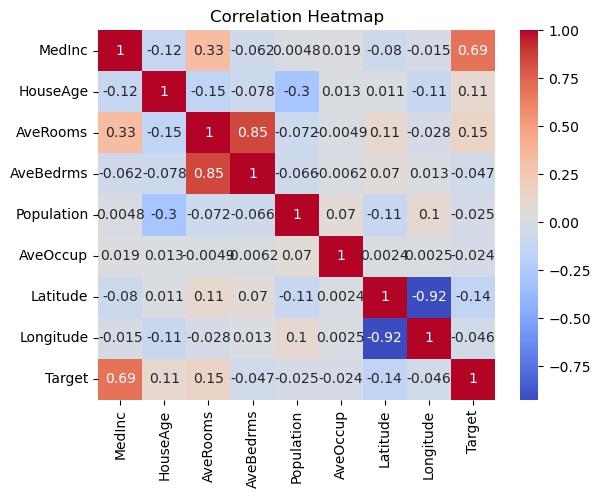

In [6]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df["Target"] = data.target

# Check for missing values
print("Missing values:", df.isnull().sum().sum())

print(df.describe())
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop("Target", axis=1))
y = df["Target"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**Why Standardization?**
- Essential for models like SVR and Linear Regression which are sensitive to feature scale.
- Helps faster convergence and improves stability of gradient-based models.


##  2. Regression Algorithm Implementation

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} model trained.")


Linear Regression model trained.
Decision Tree model trained.


##  3. Model Evaluation and Comparison

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mse, mae, r2])
    print(f"{name}: MSE={mse:.4f}, MAE={mae:.4f}, R²={r2:.4f}")

results_df = pd.DataFrame(results, columns=["Model", "MSE", "MAE", "R²"]).sort_values("R²", ascending=False)
results_df


##  4. Cross-Validation and Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# Example: Grid search on Random Forest
param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20]
}
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')
grid_rf.fit(X_train, y_train)

print("Best Random Forest Params:", grid_rf.best_params_)

# Cross-validation for all models
cv_scores = {}
for name, model in models.items():
    score = cross_val_score(model, X_scaled, y, cv=5, scoring='r2').mean()
    cv_scores[name] = score

print("Cross-Validation R² Scores:")
for model_name, score in cv_scores.items():
    print(f"{model_name}: {score:.4f}")


##  5. Selecting the Best Regression Model

Based on:
- **Evaluation metrics (R², MSE, MAE)**
- **Cross-validation stability**
- **Hyperparameter tuning results**

The **best model** is the one with consistently high R² across test set and cross-validation, and lower MSE/MAE.

The **worst performer** typically has high MSE and lower R², possibly due to overfitting (Decision Tree) or poor kernel choice (SVR).
